In [1]:
import numpy as np
import random
import multiprocessing as mproc
import matplotlib.pyplot as plt

import scipy as sp

import model_opt
import data_generate
import algo_GD
import helper

In [2]:
noise = helper.pareto
f = model_opt.RosenBrock(err = 100,noise=noise)
w = np.array([3,3])

In [3]:
f.noise
_t_max = 2
algo = algo_GD.SGD(w_init=w,t_max=_t_max,a=0.0007)

In [4]:
algo.update(model=f)

In [5]:
algo.w

array([-2.04344183,  3.83935817])

In [6]:
if __name__ == "__main__":
    
    # 自分のマシンでコアが４or6
    cpu_count = mproc.cpu_count()
    mypool = mproc.Pool(cpu_count)
    w = np.ones(cpu_count)
    first_result = mypool.map(func=helper.pareto, iterable=w)
    
    mypool.close() # important for stopping memory leaks.
    mypool.join() # wait for all workers to exit.

In [7]:
first_result

[1.3090321335200796, 0.0760153886271413, 0.526974676031116, 1.3255613719398052]

In [8]:
x = np.arange(10)
noise = helper.gauss(x)
k = helper.iqr(noise)

In [9]:
k

1.5155227078849602

In [10]:
iqr_store = []
for i in range(10000):
    x = np.arange(10000)
    noise = helper.gauss(x,scale=100,loc=0)
    k = helper.iqr(noise)
    iqr_store.append(k)

(array([2.000e+00, 3.700e+01, 2.220e+02, 1.066e+03, 2.429e+03, 3.017e+03,
        2.092e+03, 9.200e+02, 1.900e+02, 2.500e+01]),
 array([128.20083896, 129.42872896, 130.65661895, 131.88450895,
        133.11239895, 134.34028894, 135.56817894, 136.79606893,
        138.02395893, 139.25184892, 140.47973892]),
 <a list of 10 Patch objects>)

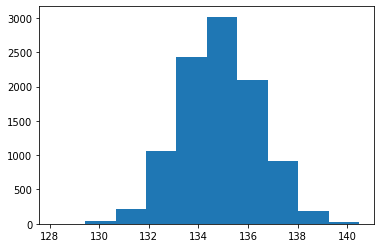

In [11]:
plt.hist(iqr_store)

In [12]:
np.mean(iqr_store) / 1.349

99.96391116626194

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  2.,  1.,
         2.,  2.,  1.,  4.,  5.,  5.,  1.,  5.,  6.,  3.,  8.,  4.,  8.,
        10., 15., 10., 12., 12.,  9., 17., 11., 23., 15., 28., 25., 26.,
        27., 19., 14., 27., 29., 17., 23., 29., 21., 26., 29., 36., 18.,
        30., 27., 24., 26., 21., 23., 21., 15., 14., 29., 22., 15., 11.,
        17., 12., 12.,  7., 12., 10.,  8.,  2.,  4.,  6.,  9.,  5.,  3.,
         1.,  2.,  4.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  0.,  1.,  1.,
         2.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([0.75917981, 0.76647175, 0.77376369, 0.78105562, 0.78834756,
        0.7956395 , 0.80293144, 0.81022337, 0.81751531, 0.82480725,
        0.83209918, 0.83939112, 0.84668306, 0.853975  , 0.86126693,
        0.86855887, 0.87585081, 0.88314274, 0.89043468, 0.89772662,
        0.90501855, 0.91231049, 0.91960243, 0.92689437, 0.9341863 ,
        0.94147824, 0.94877018, 0.95606211, 0.96335405, 0.97064599,
        0.97793792, 0.9852

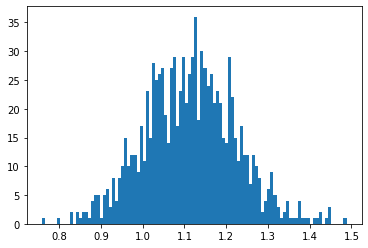

In [13]:
plt.hist(helper.lognormal(mean=0.1,sigma=0.1,w=np.arange(1000)),bins=100)

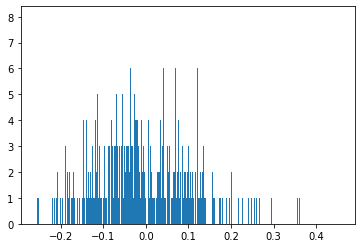

In [14]:
k = helper.lognormal(mean=0.1,sigma=0.1,w=np.arange(1000))
plt.hist(k - k.mean(),bins=1000)
plt.show()

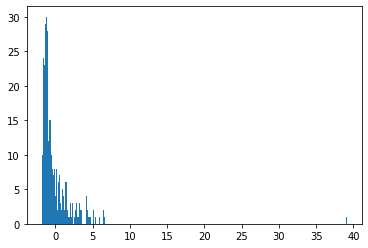

In [15]:
k = helper.lognormal(mean=0.1,sigma=1,w=np.arange(1000))
plt.hist(k - k.mean(),bins=1000)
plt.show()

In [16]:
helper.iqr(k)

1.611299948703655